In [3]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
sns.set_theme(rc = {"figure.figsize": (14, 4)})

In [19]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
print(df.shape)
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

(442, 10)


In [20]:
df.head()

,bmi,s1,s2,s3,s4,s5,s6
0,0.061696,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.051474,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.044451,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.011595,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,-0.036385,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


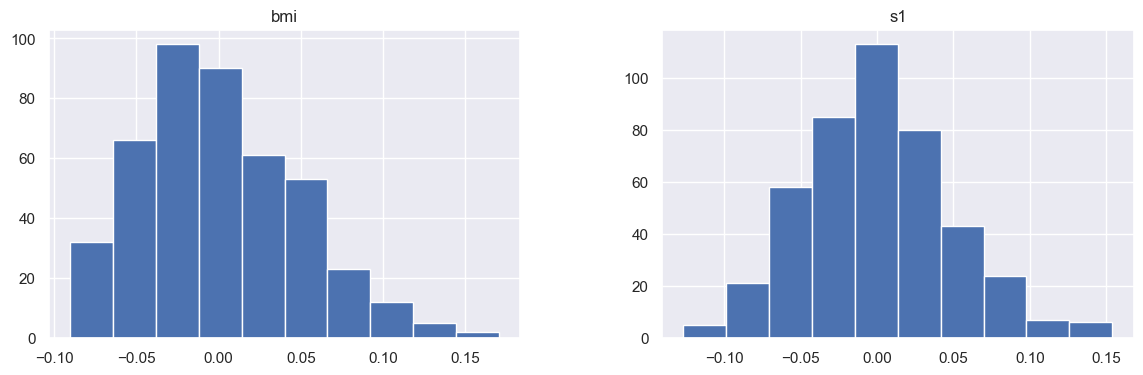

In [21]:
df[['bmi', 's1']].hist()
plt.show()

Verifier les distributions

In [16]:
df[['bmi', 's1']].describe()


,bmi,s1
count,4.420000e+02,4.420000e+02
mean,-2.245564e-16,-1.381499e-17
std,4.761905e-02,4.761905e-02
min,-9.027530e-02,-1.267807e-01
25%,-3.422907e-02,-3.424784e-02
50%,-7.283766e-03,-4.320866e-03
75%,3.124802e-02,2.835801e-02
max,1.705552e-01,1.539137e-01


Verifier les valeurs aberrantes

<Axes: >

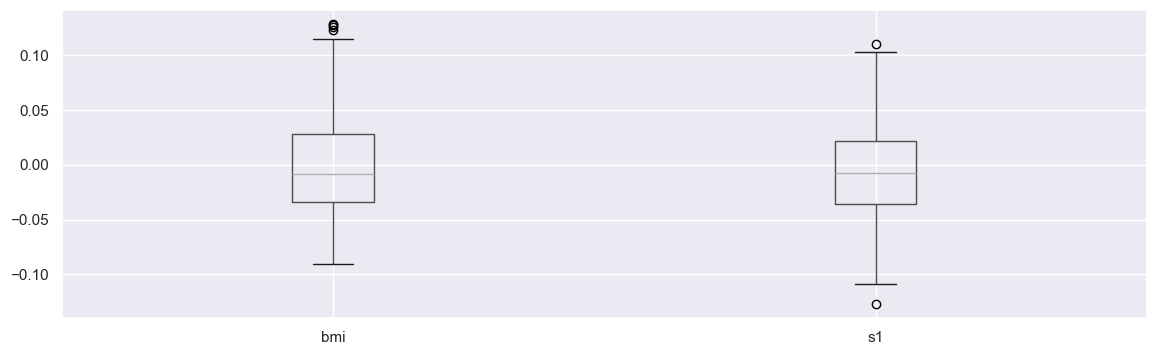

In [24]:
df[['bmi', 's1']].boxplot()

In [25]:
def drop_outliers(data, colname):
    Q1 = np.percentile(data[colname], 25)
    Q3 = np.percentile(data[colname], 75)
    limit = 1.5*(Q3 - Q1)
    
    data.drop(data[data[colname] >= (limit + Q3)].index, inplace=True)
    data.drop(data[data[colname] <= (Q1 - limit)].index, inplace=True)

for colname in df.columns:
    drop_outliers(df, colname)

<Axes: >

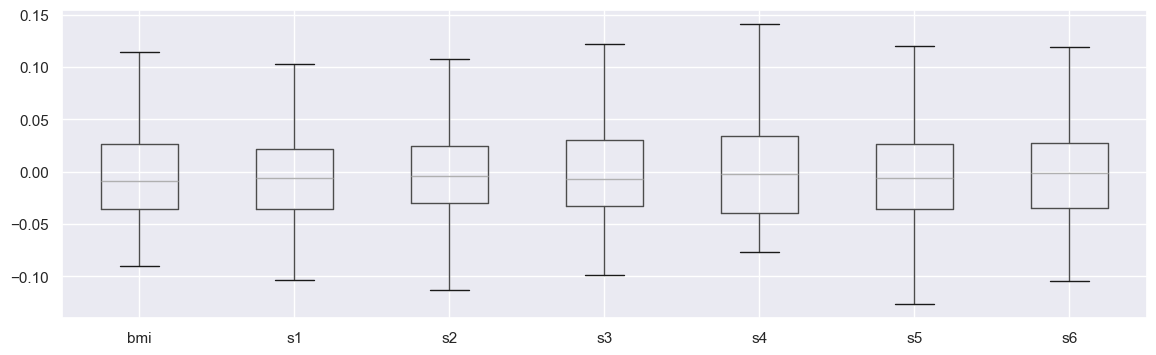

In [38]:
df[['bmi', 's1']].boxplot()

### Application de la methode Normalisation sur les donnnees

- Le graphique avant l'application de la methode MinMaxScaler

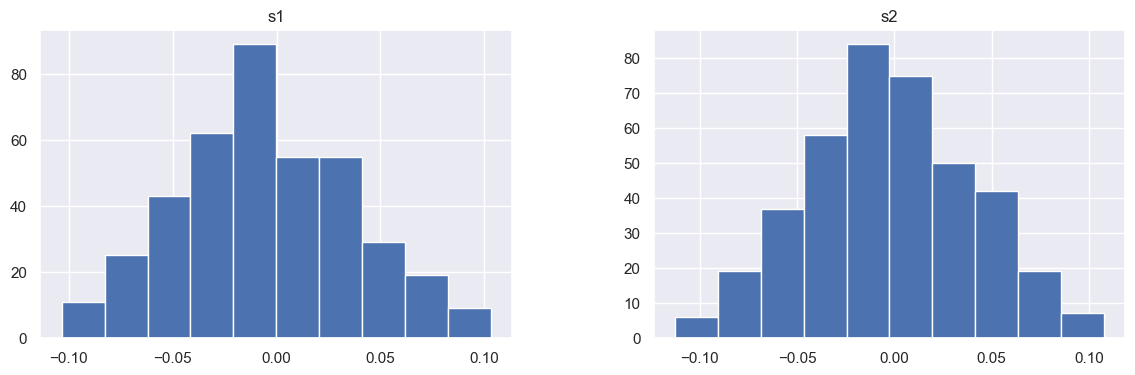

In [47]:
df[['bmi', 's1']].hist()
plt.show()

In [49]:
df[['bmi', 's1']].describe()

,bmi,s1
count,397.000000,397.000000
mean,-0.003138,-0.004768
std,0.044119,0.041788
min,-0.090275,-0.103389
25%,-0.035307,-0.035968
50%,-0.008362,-0.005697
75%,0.026128,0.021822
max,0.114509,0.103003


In [34]:
brouillon = df[['bmi', 's1']]

In [35]:
data_norm = pd.DataFrame(MinMaxScaler().fit_transform(brouillon), columns=brouillon.columns)

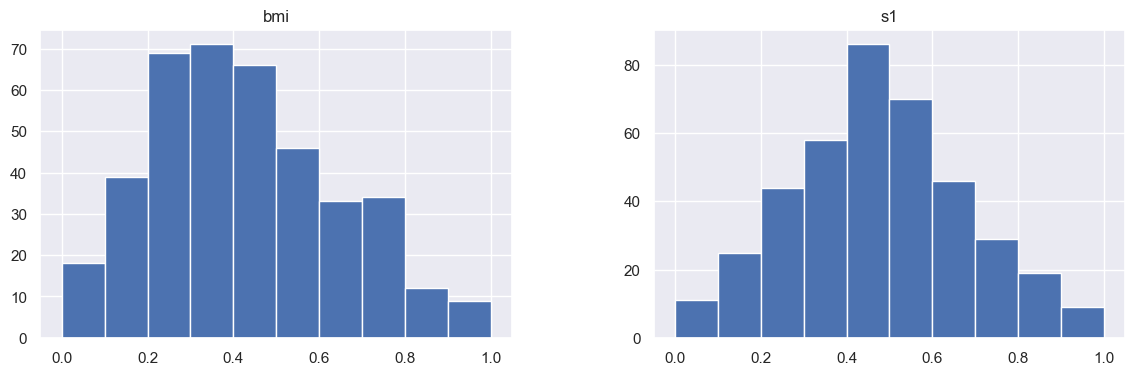

In [37]:
data_norm[['bmi', 's1']].hist()
plt.show()

### Application de la methode STANDARDISATION sur les donnnees


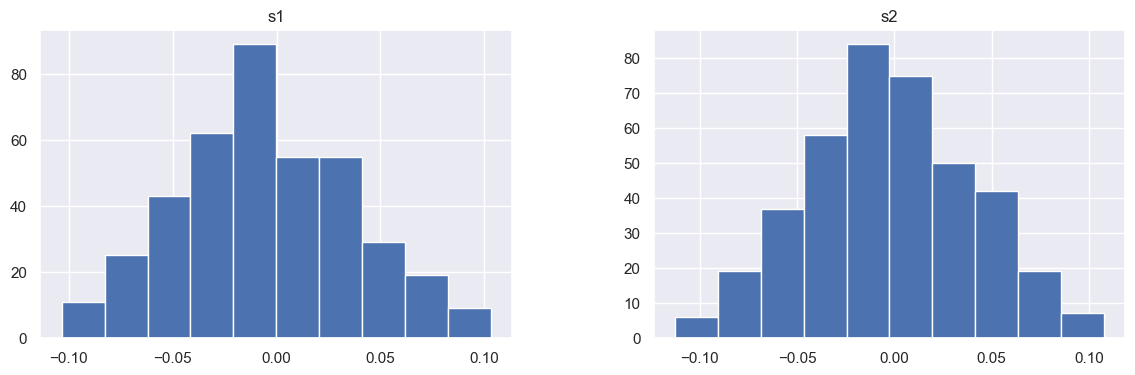

In [50]:
df[['s1', 's2']].hist()
plt.show()

In [51]:
df[['s1', 's2']].describe()

,s1,s2
count,397.000000,397.000000
mean,-0.004768,-0.002895
std,0.041788,0.042017
min,-0.103389,-0.112795
25%,-0.035968,-0.030124
50%,-0.005697,-0.003819
75%,0.021822,0.024991
max,0.103003,0.107662


In [54]:
data = df[['s1', 's2']]

In [53]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

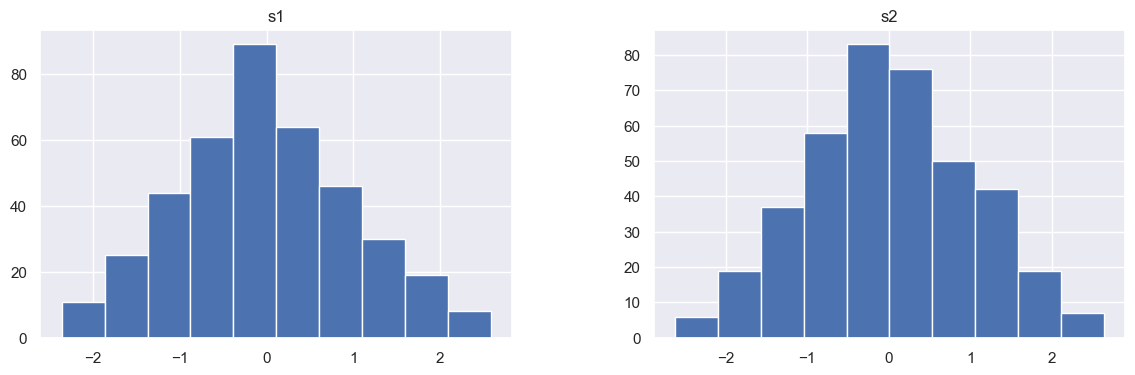

In [56]:
data_std.hist()
plt.show()